In [4]:
import matplotlib.pyplot as plt
from mxnet import autograd, nd, gluon
from mxnet.gluon.data.vision import transforms

In [5]:
def get_dataloader(batch_size):
    transformer = transforms.Compose([
        transforms.ToTensor()
    ])
    train = gluon.data.vision.datasets.FashionMNIST(train=True)
    train = train.transform_first(transformer)
    train_iter = gluon.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=4)
    test = gluon.data.vision.datasets.FashionMNIST(train=False)
    test = test.transform_first(transformer)
    test_iter = gluon.data.DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=4)
    return train_iter, test_iter

In [12]:
def show_images(X, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    axes = axes.flatten()
    for img, ax in zip(X, axes):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    return axes

In [39]:
def accuracy(net, data_iter):
    acc = 0
    size = 0
    for X, y in data_iter:
        res = net(X)
        y_hat = softmax(res)
        acc += (y_hat.argmax(axis=1) == y.astype('float32')).sum().asscalar()
        size += len(y)
    return acc / size

In [24]:
def softmax(X):
    X_exp = X.exp()
    normalization_constant = X_exp.sum(axis=1, keepdims=True)
    return X_exp / normalization_constant

In [14]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = nd.dot(X, W1) + b1
    H = H.relu()
    O = nd.dot(H, W2) + b2
    return O

In [17]:
batch_size = 256
train_iter, test_iter = get_dataloader(batch_size)

In [18]:
num_inputs = 28 * 28
num_hidden = 256
num_output = 10

In [23]:
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hidden))
b1 = nd.zeros(num_hidden)
W2 = nd.random.normal(scale=0.01, shape=(num_hidden, num_output))
b2 = nd.zeros(num_output)
params = [W1, b1, W2, b2]
for param in params:
    param.attach_grad()

In [42]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()
epochs = 20
lr = 0.1
for epoch in range(epochs):
    for X, y in train_iter:
        with autograd.record():
            res = net(X)
            l = loss(res, y)
        l.backward()
        for param in params:
            param[:] = param - (lr/batch_size) * param.grad
    epoch_acc = accuracy(net, test_iter)
    print("Epoch %d, acc %f" % (epoch, epoch_acc))

Epoch 0, acc 0.867200
Epoch 1, acc 0.863100
Epoch 2, acc 0.871100
Epoch 3, acc 0.871200
Epoch 4, acc 0.873800
Epoch 5, acc 0.875400
Epoch 6, acc 0.877300
Epoch 7, acc 0.877300
Epoch 8, acc 0.878700
Epoch 9, acc 0.875600
Epoch 10, acc 0.881900
Epoch 11, acc 0.879400
Epoch 12, acc 0.883200
Epoch 13, acc 0.876400
Epoch 14, acc 0.878000
Epoch 15, acc 0.885300
Epoch 16, acc 0.884300
Epoch 17, acc 0.886200
Epoch 18, acc 0.883500
Epoch 19, acc 0.884100


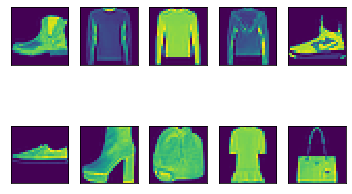

(256, 28, 28)
(256, 10)


In [22]:
for X, y in train_iter:
    X = X.squeeze(axis=1)
    show_images(X.asnumpy(), 2, 5)
    res = net(X)
    print(X.shape)
    print(res.shape)
    break